In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

In [ ]:
def image_window_normalization(image_window):
  #for normalization, first average is found and then the image is transformed
  #into a zero centered image and afterwards normalized
  mean=np.mean(image_window)
  new_image=image_window-mean
  fin_image=np.sum(np.square(new_image))
  fin_image=np.sqrt(fin_image)
  if fin_image==0.0:
    fin_image=10^-7
  fin_image=new_image/fin_image
  return fin_image


In [ ]:
def normalized_correlation(normalized_left,normalized_right):
  flattened_left=normalized_left.flatten()
  flattened_right=normalized_right.flatten()
  cross_correlation = np.dot(flattened_right,flattened_left)
  return cross_correlation

In [ ]:
def disparity_map_estimator(window_size,right_image,left_image):
  #we will use square image patches
  disparity_map_estimate=np.zeros([right_image.shape[0],right_image.shape[1]])
  if window_size%2==1:
    window_size=window_size
  else:
    window_size=window_size+1
  for i in range((window_size//2), right_image.shape[0] - (window_size//2)):
    for j in range((window_size//2),right_image.shape[1]-window_size//2):
      max_dist=float("-inf")
      current_disparity=0
      right_window=right_image[i - (window_size//2): i + (window_size//2) + 1, j - (window_size//2): j +(window_size//2) + 1]
      normalized_right=image_window_normalization(right_window)
      d_lim=right_image.shape[1]-j-(window_size//2)
      if d_lim>65:
        d_lim=66
      for d in range(0,d_lim):
        left_window=left_image[i - (window_size//2): i + (window_size//2) + 1, j+d - (window_size//2): j + d+ (window_size//2) + 1]
        normalized_left=image_window_normalization(left_window)
        disparity=normalized_correlation(normalized_left,normalized_right)
        if disparity >max_dist:
          max_dist=disparity
          current_disparity=d
      disparity_window=np.ones([window_size,window_size])
      for g in range (0,window_size):
        for h in range (0,window_size):
          disparity_window[g][h]=current_disparity
      disparity_map_estimate[i-(window_size//2):i+(window_size//2)+1,j-(window_size//2):j+(window_size//2)+1]+=disparity_window
  return disparity_map_estimate





In [ ]:
directory="/content/drive/My Drive/data_disparity_estimation"
all_image_pathes=[]
for image_class in os.listdir(directory):
  path_appended=os.path.join(directory,image_class)
  full_path=glob(path_appended+ "/*")
  for individual_image in full_path:
    all_image_pathes.append(individual_image)

cloth_images=[]
plastic_images=[]
for pathes in all_image_pathes:
  if "cloth" in pathes and "disp_" not in pathes:
    cloth_images.append(pathes)
  elif "plastic" in pathes and "disp_" not in pathes:
    plastic_images.append(pathes)
print(cloth_images)
print(plastic_images)


['/content/drive/My Drive/data_disparity_estimation/cloth/left.png', '/content/drive/My Drive/data_disparity_estimation/cloth/right.png']
['/content/drive/My Drive/data_disparity_estimation/plastic/right.png', '/content/drive/My Drive/data_disparity_estimation/plastic/left.png']


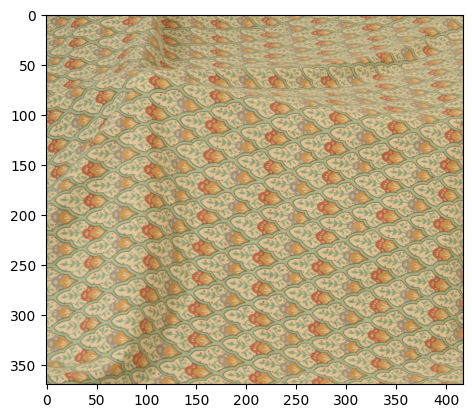

In [ ]:
image = Image.open(cloth_images[1])
plt.imshow(image)

In [ ]:
which_class=input("Which photo is wanted for the disparity mapping?: ")
if which_class.lower()=="cloth":
  right_image=cloth_images[1]
  left_image=cloth_images[0]
elif which_class.lower()=="plastic":
  right_image=plastic_images[0]
  left_image=plastic_images[1]
right_image=cv2.imread(right_image,0)
left_image=cv2.imread(left_image,0)
#shapes are checked in order if a resizing is needed
print(right_image.shape)
print(left_image.shape)
if right_image.any() != None:
  print("Right image of "+ which_class+ " is loaded!")
if left_image.any() != None:
  print("Left image of "+ which_class+ " is loaded!")



Which photo is wanted for the disparity mapping?: plastic
(370, 423)
(370, 423)
Right image of plastic is loaded!
Left image of plastic is loaded!


In [ ]:
left_image = np.flipud(np.fliplr(left_image))
right_image = np.flipud(np.fliplr(right_image))


row:  2
row:  3
row:  4
row:  5
row:  6
row:  7
row:  8
row:  9
row:  10
row:  11
row:  12
row:  13
row:  14
row:  15
row:  16
row:  17
row:  18
row:  19
row:  20
row:  21
row:  22
row:  23
row:  24
row:  25
row:  26
row:  27
row:  28
row:  29
row:  30
row:  31
row:  32
row:  33
row:  34
row:  35
row:  36
row:  37
row:  38
row:  39
row:  40
row:  41
row:  42
row:  43
row:  44
row:  45
row:  46
row:  47
row:  48
row:  49
row:  50
row:  51
row:  52
row:  53
row:  54
row:  55
row:  56
row:  57
row:  58
row:  59
row:  60
row:  61
row:  62
row:  63
row:  64
row:  65
row:  66
row:  67
row:  68
row:  69
row:  70
row:  71
row:  72
row:  73
row:  74
row:  75
row:  76
row:  77
row:  78
row:  79
row:  80
row:  81
row:  82
row:  83
row:  84
row:  85
row:  86
row:  87
row:  88
row:  89
row:  90
row:  91
row:  92
row:  93
row:  94
row:  95
row:  96
row:  97
row:  98
row:  99
row:  100
row:  101
row:  102
row:  103
row:  104
row:  105
row:  106
row:  107
row:  108
row:  109
row:  110
row:  111
row:  

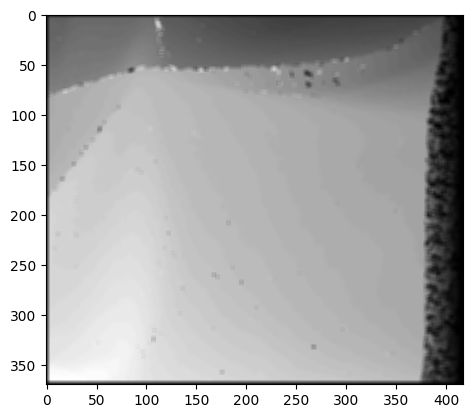

In [ ]:
disparity_map_estimate = disparity_map_estimator(5,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()

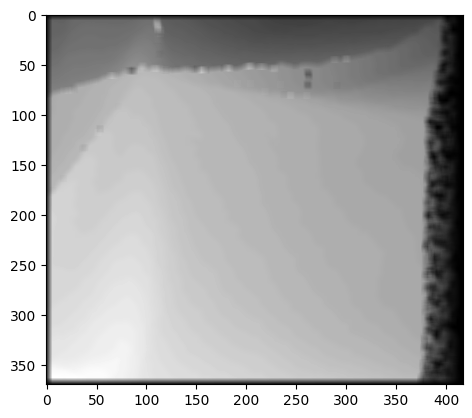

In [ ]:
disparity_map_estimate = disparity_map_estimator(7,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()

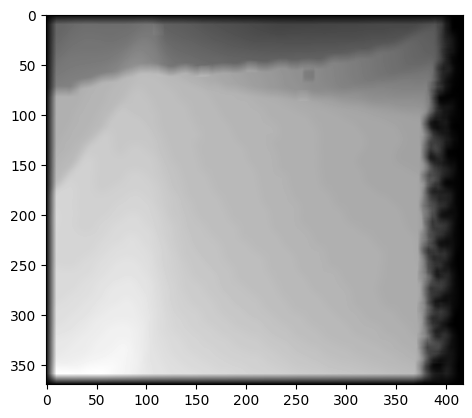

In [ ]:
disparity_map_estimate = disparity_map_estimator(11,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()

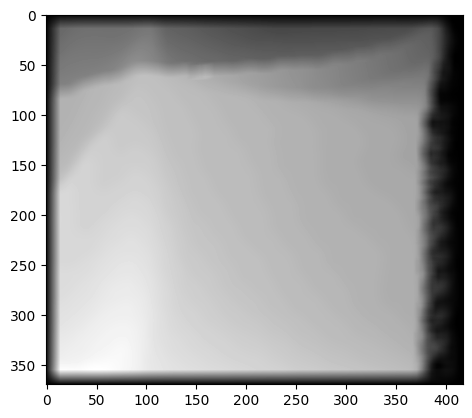

In [ ]:
disparity_map_estimate = disparity_map_estimator(15,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()

row:  2
row:  3
row:  4
row:  5
row:  6
row:  7
row:  8
row:  9
row:  10
row:  11
row:  12
row:  13
row:  14
row:  15
row:  16
row:  17
row:  18
row:  19
row:  20
row:  21
row:  22
row:  23
row:  24
row:  25
row:  26
row:  27
row:  28
row:  29
row:  30
row:  31
row:  32
row:  33
row:  34
row:  35
row:  36
row:  37
row:  38
row:  39
row:  40
row:  41
row:  42
row:  43
row:  44
row:  45
row:  46
row:  47
row:  48
row:  49
row:  50
row:  51
row:  52
row:  53
row:  54
row:  55
row:  56
row:  57
row:  58
row:  59
row:  60
row:  61
row:  62
row:  63
row:  64
row:  65
row:  66
row:  67
row:  68
row:  69
row:  70
row:  71
row:  72
row:  73
row:  74
row:  75
row:  76
row:  77
row:  78
row:  79
row:  80
row:  81
row:  82
row:  83
row:  84
row:  85
row:  86
row:  87
row:  88
row:  89
row:  90
row:  91
row:  92
row:  93
row:  94
row:  95
row:  96
row:  97
row:  98
row:  99
row:  100
row:  101
row:  102
row:  103
row:  104
row:  105
row:  106
row:  107
row:  108
row:  109
row:  110
row:  111
row:  

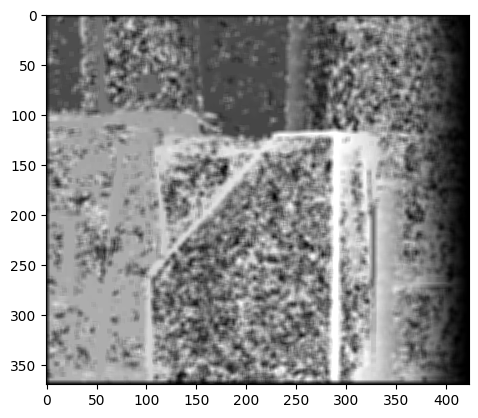

In [ ]:
disparity_map_estimate = disparity_map_estimator(5,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()

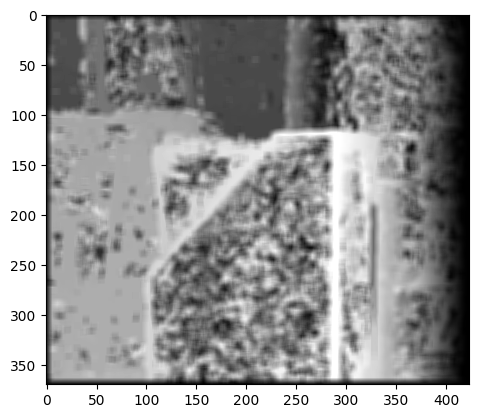

In [ ]:
disparity_map_estimate = disparity_map_estimator(7,right_image,left_image)
plt.imshow(disparity_map_estimate / np.max(disparity_map_estimate),cmap="gray")
plt.show()